<a href="https://colab.research.google.com/github/yusufsugiono/timeseries-model-windspeed-in-szeged/blob/main/TimeSeriesModel_WindSpeedinSzeged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Model : Wind Speed in Szeged


Dataset : https://www.kaggle.com/budincsevity/szeged-weather
</br></br>
Oleh:  
[Yusuf Sugiono](https://www.dicoding.com/users/yusufsugiono)   
Kabupaten Nganjuk, Jawa Timur  
Universitas Trunojoyo Madura

20 September 2021

## Import Dataset

Untuk memudahkan pengolahan dataset, saya telah mengunduh dan menyimpan dataset tersebut di Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('gdrive/MyDrive/weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## Eksplorasi Data



In [ ]:
number_of_samples = len(df)

print(f"Number of samples : {number_of_samples}")

Number of samples : 96453


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Dari output di atas dapat diketahui bahwa ada 517 missing-value pada kolom Precip Type. Namun pada praktek ini saya hanya akan menggunakan kolom 'Wind Speed (km/h)' , jadi missing-value tersebut saya abaikan.

Berikut ini akan ditampilkan grafik visualisasi kecepatan angin dari waktu ke waktu. Untuk dapat melakukan plotting dapat menggunakan nilai dari kolom 'Wind Speed (km/h)'

In [ ]:
wind = df['Wind Speed (km/h)'].values

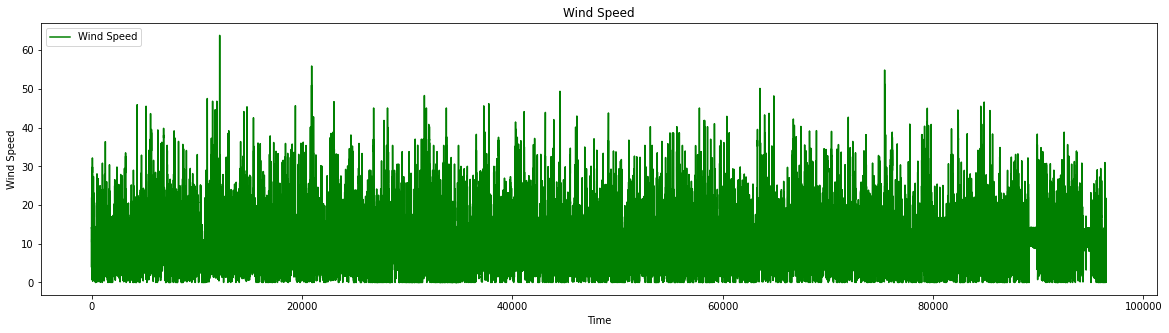

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(wind, color='green')
plt.title('Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Time')
plt.legend(['Wind Speed'], loc='upper left')
plt.show()

## Preprocessing

Sebelum data diproses lebih lanjut, alangkah lebih baik jika kita melakukan preproses terlebih dahulu

### Normalisasi

Data kecepatan angin pada dataset sebelumnya dapat dinormalisasi sehingga rentang nilainya antara 0 dan 1.

In [ ]:
# Normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(df[['Wind Speed (km/h)']])

### Split Data

Pada langkah ini dataset akan dibagi menjadi data latih, data validasi dan data test. Perbandingan yang dipakai adalah 70 : 20 : 10

In [ ]:
import math

train_sample = 70/100
train_len = math.ceil(train_sample * len(scaled))

val_sample = 20/100
val_len = math.ceil(val_sample * len(scaled))

test_sample = 10/100
test_len = math.ceil(test_sample * len(scaled))

print(train_len, val_len, test_len, len(scaled))

df_train = scaled[:train_len]
df_val = scaled[ train_len : (train_len+val_len) ]
df_test = scaled[-test_len:]

67518 19291 9646 96453


In [ ]:
wind_train = df_train.reshape((len(df_train)),)
wind_valid = df_val.reshape((len(df_val)),)
wind_test = df_test.reshape((len(df_test)),)

In [ ]:
# Jumlah Data

total_train = len(wind_train)
total_val = len(wind_valid)
total_test = len(wind_test)
total_data = total_train + total_val + total_test
percent_train = total_train / total_data * 100
percent_val = total_val / total_data * 100
percent_test = total_test / total_data * 100

print(f"Jumlah Data Train dan Validasi \t: {total_data} \n")

print(f"Jumlah Data Train \t: {total_train}")
print(f"Jumlah Data Validasi \t: {total_val}")
print(f"Jumlah Data Test \t: {total_test} \n")

print("Presentase Data Train \t: %.0f persen dari seluruh data"%(percent_train))
print("Presentase Data Validasi: %.0f persen dari seluruh data"%(percent_val))
print("Presentase Data Test \t: %.0f persen dari seluruh data"%(percent_test))

Jumlah Data Train dan Validasi 	: 96455 

Jumlah Data Train 	: 67518
Jumlah Data Validasi 	: 19291
Jumlah Data Test 	: 9646 

Presentase Data Train 	: 70 persen dari seluruh data
Presentase Data Validasi: 20 persen dari seluruh data
Presentase Data Test 	: 10 persen dari seluruh data


## Membangun Model

### Menyiapkan Fungsi Windowed Dataset

Fungsi ini berguna untuk mengubah data latih agar dapat digunakan saat train model

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

### Membuat Callback

Callback berikut ini dibuat untuk mengetahui nilai val_mae minimum saat proses training.

In [ ]:
import tensorflow as tf

class Callback(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.best = {
            'epoch' : 0,
            'val_mae' : 0
        }

    def on_epoch_end(self, epoch, logs={}):
        if (epoch > 1):
            if(logs.get('val_mae') < self.best['val_mae']):
                self.best['epoch'] = epoch + 1
                self.best['val_mae'] = logs.get('val_mae')
        else:
            self.best['epoch'] = epoch + 1 
            self.best['val_mae'] = logs.get('val_mae')

    def on_train_end(self, logs=None):
        print("Train selesai!\nDidapatkan val_mae terbaik {} pada epoch ke-{}".format(self.best['val_mae'], self.best['epoch']))
 
callbacks = Callback()

### Menyusun Layer Model

Layer yang saya gunakan untuk model time series ini adalah layer Bidirectional, LSTM, dan Dense.  
Saya menggunakan optimizer Adamax dengan learning rate 1e-4.

In [ ]:
tf.keras.backend.clear_session()

train_set = windowed_dataset(wind_train, window_size=64, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(wind_valid, window_size=64, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-4)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

## Melatih Model

In [ ]:
history = model.fit(
    train_set,
    epochs=25,
    validation_data=val_set,
    callbacks=[callbacks]
)

Epoch 1/25
675/675 [==============================] - 50s 64ms/step - loss: 0.0037 - mae: 0.0645 - val_loss: 0.0023 - val_mae: 0.0511
Epoch 2/25
675/675 [==============================] - 38s 56ms/step - loss: 0.0023 - mae: 0.0511 - val_loss: 0.0019 - val_mae: 0.0462
Epoch 3/25
675/675 [==============================] - 38s 56ms/step - loss: 0.0020 - mae: 0.0476 - val_loss: 0.0018 - val_mae: 0.0443
Epoch 4/25
675/675 [==============================] - 38s 57ms/step - loss: 0.0019 - mae: 0.0462 - val_loss: 0.0017 - val_mae: 0.0433
Epoch 5/25
675/675 [==============================] - 38s 57ms/step - loss: 0.0019 - mae: 0.0455 - val_loss: 0.0017 - val_mae: 0.0425
Epoch 6/25
675/675 [==============================] - 38s 56ms/step - loss: 0.0018 - mae: 0.0451 - val_loss: 0.0017 - val_mae: 0.0429
Epoch 8/25
675/675 [==============================] - 38s 56ms/step - loss: 0.0018 - mae: 0.0449 - val_loss: 0.0016 - val_mae: 0.0419
Epoch 9/25
675/675 [==============================] - 38s 56ms

## Visualisasi Plot MAE dan Loss

### Plot Training MAE vs Validation MAE

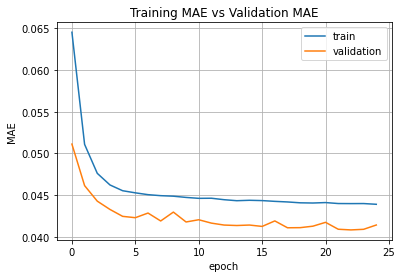

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training MAE vs Validation MAE')
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.show()

### Plot Training Loss dan Validation Loss

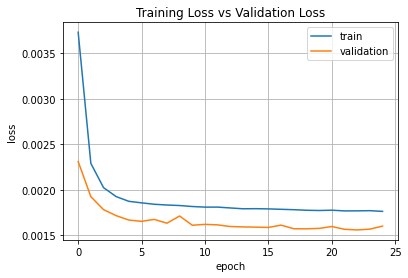

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.show()

## Melakukan Pengujian Model dengan Data Test

Setelah didapatkan model yang cukup baik, berikut ini saya menguji coba model untuk memprediksi kecepatan angin lalu membandingkannya dengan data aslinya.

In [ ]:
test_data = df_test.copy()
for i in range(len(test_data)-64):
  pred = test_data[i+1:i+64,0]
  pred = pred.reshape(1, 63, 1)
  prediction = model.predict(pred)
  test_data[63+i] = prediction

In [ ]:
wind_actual = scaler.inverse_transform(df_test)
wind_predictions = scaler.inverse_transform(test_data)

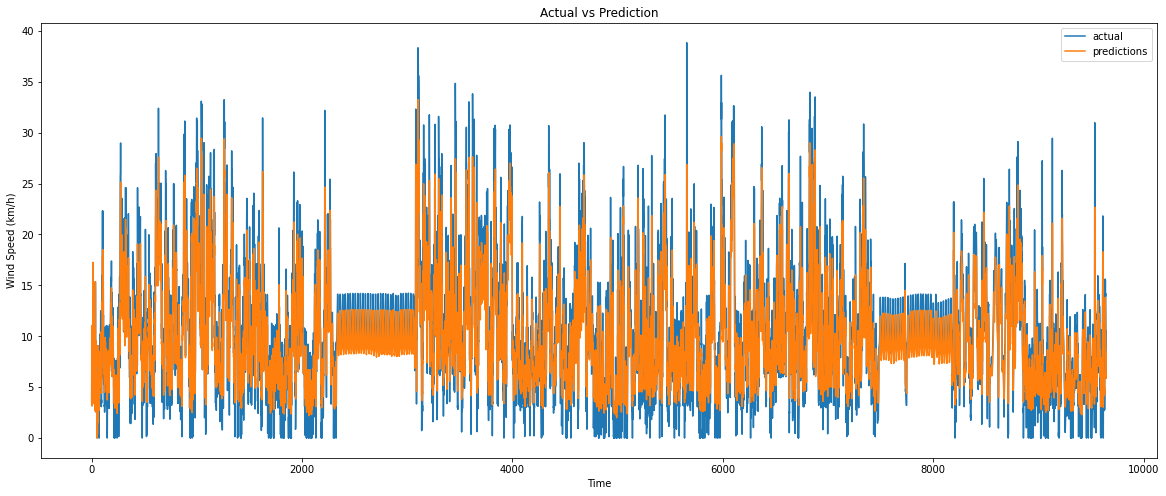

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(wind_actual)
plt.plot(wind_predictions)
plt.title('Actual vs Prediction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (km/h)')
plt.legend(['actual','predictions'], loc='upper right')
plt.show()

## Menyimpan Model

Jika model dirasa sudah cukup baik, maka dapat disimpan agar dapat digunakan kembali.

In [ ]:
model.save('time_series_model.h5')